# Sparse Plane Array

疎な平配

In [5]:
Format[splarr[ruleLi_List]] := 
  With[
    {
      minPos = Min[#, 0] & /@ Min /@ Transpose[ReIm[First[#]] & /@ ruleLi], 
      maxPos = Max[#, 0] & /@ Max /@ Transpose[ReIm[First[#]] & /@ ruleLi]
    }, 
    With[{
      tbl = PadRight[
        Normal[
          SparseArray[(1 - minPos + ReIm[#[[1]]]) -> #[[2]] & /@ ruleLi]
        ], maxPos + 1 - minPos
      ]}, 
      Grid[
        Transpose[
          ReplacePart[tbl, 
            1 - minPos -> Item[
              Extract[tbl, 1 - minPos], Frame -> True
            ]
          ]
        ]
      ]
    ]
  ]

In [6]:
normal[splarr[ruleLi__List]] := 
    splarr[Normal[Map[Plus @@ (Last[#] & /@ #) &, GroupBy[ruleLi, First]]]]

In [7]:
Unprotect[Plus];
Plus[splarr[ruleLi1_List], splarr[ruleLi2_List]] := 
    normal[splarr[Join[ruleLi1, ruleLi2]]]
Plus[sa1_splarr, b_] := Plus[sa1, splarr[{0 -> b}]]
Protect[Plus];

In [11]:
convApply[f_, li_List, val_] := f[#, val] & /@ li
convApply[f_, li1_List, li2_List] := convApply[f, li1, #] & /@ li2

Unprotect[Times];
Times[splarr[ruleLi1_List], splarr[ruleLi2_List]] := 
    normal[splarr[
        Join @@ convApply[
            (#1[[1]] + #2[[1]]) -> (#1[[2]] #2[[2]]) &, ruleLi1, ruleLi2
        ]
    ]]
Times[sa1_splarr, b_] := Times[sa1, splarr[{0 -> b}]]
Protect[Times];

In [17]:
Unprotect[Power];
Power[a_splarr, b_?Positive] := normal[Fold[Times, Table[a, b]]]
Protect[Power];

Item[11, Frame -> True]   0   0   1

7                         0   0   0

0                         0   0   0

5                         0   0   0
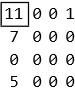

In [20]:
splarr[{
    0 -> 3,
    I -> 7
}] + splarr[{
    0 -> 8,
    3 -> 1,
    3I -> 5
}]

1   Item[2, Frame -> True]   1

1   1                        0
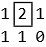

In [21]:
splarr[{
    0 -> 1,
    1 -> 1,
    I -> 1
}] splarr[{
    0 -> 1,
    -1 -> 1
}]

In [ ]:
Unprotect[NonCommutativeMultiply];
NonCommutativeMultiply[splarr[ruleLi1_List], splarr[ruleLi2_List]] := Sum[Sum[splarr[{ First[rule2] + First[rule1] Last[rule2] -> Last[rule1] }], {rule1, ruleLi1}], {rule2, ruleLi2}]
Protect[NonCommutativeMultiply];

Item[1, Frame -> True]   1

1                        0

1                        0
Item[1, Frame -> True]   1   1   1

1                        1   1   1

1                        1   1   1

1                        1   1   1
Item[1, Frame -> True]   0    1   0

0                        0    0   0

0                        0    0   0

0                        -1   0   -1
Item[1, Frame -> True]   1   1   1

1                        1   1   1

1                        1   1   1

1                        1   1   1
Item[0, Frame -> True]   0   0   I

-I                       0   0   0

0                        0   0   I

-I                       0   0   0
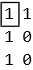
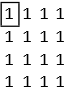
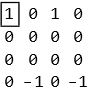
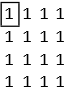
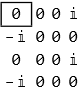

In [ ]:
splarr[{0 -> 1, 1 -> 1, I -> 1, 2I -> 1}]

splarr[{0 -> 1, 1 -> 1, I -> 1, 2I -> 1}] ** splarr[{0 -> 1, 1 + 3I -> -1, 2 -> 1, 3 + 3I -> -1}]
splarr[{0 -> 1, 1 + 3I -> -1, 2 -> 1, 3 + 3I -> -1}]

splarr[{0 -> 1, 1 -> 1, I -> 1, 2I -> 1}] ** splarr[{I -> -I, 3 -> I, 3I -> -I, 3 + 2I -> I}]
splarr[{I -> -I, 3 -> I, 3I -> -I, 3 + 2I -> I}]

In [142]:
Unprotect[CircleTimes];
CircleTimes[splarr[ruleLi1_List], splarr[ruleLi2_List]] := Sum[Sum[splarr[{ First[rule1] First[rule2] -> Last[rule1] Last[rule2] }], {rule1, ruleLi1}], {rule2, ruleLi2}]
SetAttributes[CircleTimes, { Flat, Listable, NumericFunction, OneIdentity, Orderless, Protected }]
Unprotect[CircleTimes];

1   Item[0, Frame -> True]

1   1
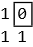

In [146]:
CircleTimes[splarr[{1 -> 1, 1 + I -> 1, I -> 1}], splarr[{I -> 1}]]

1   1                        1

1   Item[0, Frame -> True]   1

1   1                        1
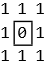

In [147]:
CircleTimes[splarr[{1 -> 1, 1 + I -> 1}], splarr[{1 -> 1, I -> 1, -1 -> 1, -I -> 1}]]

Item[0, Frame -> True]   0

0                        1

0                        1
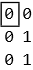

In [156]:
Times[splarr[{1 -> 1, 1 + I -> 1}], splarr[{I -> 1}]]

0   Item[0, Frame -> True]

1   1
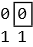

In [155]:
CircleTimes[splarr[{1 -> 1, 1 + I -> 1}], splarr[{I -> 1}]]